### This is a simple example of how to apply the Iterative Shrinkage-Thresholding Algorithm (ISTA) using PyTorch for image denoising.

ISTA is a Proximal Gradient Method, used when your loss function is convex but not differentiable.

In [1]:
# Author: Rafael Moraes
# github.com/mmoraes-rafael
# Mar/08/2019

import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage

(512, 512, 3)


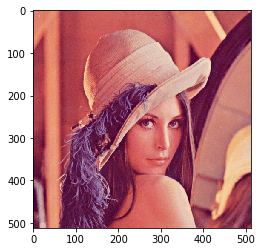

In [2]:
# Original pic
img = mpimg.imread('lenna.png')
plt.imshow(img)
print(img.shape)

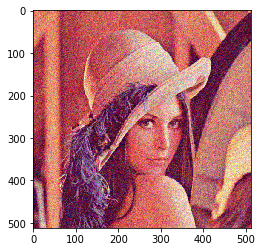

In [3]:
# Let's add some simple gaussian noise
noisy_img = skimage.util.random_noise(img)
plt.imshow(noisy_img)

In [4]:
torch.set_default_dtype(torch.double)
W = torch.randn(size=(img.shape[2], img.shape[0], img.shape[1]), dtype=torch.float)

tens_img = torch.from_numpy(img.transpose((2, 0, 1))).float()
tens_noisy_img = torch.from_numpy(noisy_img.transpose((2, 0, 1))).float()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


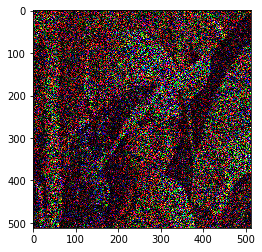

In [5]:
# The reconstruction at the start, with a random W
plt.imshow((tens_noisy_img * W).numpy().transpose((1, 2, 0)))

In [6]:
def apply_prox(in_tensor, lamb):
    x = in_tensor.clone()
    mask_zero = torch.abs(x) <= lamb
    mask_pos = x > lamb
    mask_neg = x < -lamb
    
    x[mask_zero] = 0
    x[mask_pos] -= lamb
    x[mask_neg] += lamb
    
    return x

def loss(X, Y, W, lamb):
    return torch.norm(Y - W * X).pow(2) + lamb * torch.norm(W)

In [7]:
print("The initial loss of the recontruction plus the L1 norm of weights is: ", loss(tens_img, tens_noisy_img, W, 0.01))

The initial loss of the recontruction plus the L1 norm of weights is:  tensor(467862.7812, dtype=torch.float32)


In [8]:
gamma = -0.5
lamb = 0.05
for i in range(100):
    W = apply_prox(W * (1 + 2 * gamma * tens_noisy_img * tens_noisy_img) - 2 * gamma * tens_noisy_img * tens_img, lamb)

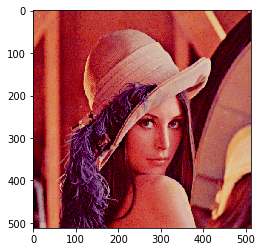

In [9]:
# Final recontructed image, without the noise
plt.imshow((tens_noisy_img * W).numpy().transpose((1, 2, 0)))

In [10]:
loss(tens_img, tens_noisy_img, W, 0.01)

tensor(28190.0371, dtype=torch.float32)